# Исследование объявлений о продаже квартир

# Описание проекта

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 


# Цель: 

Определить рыночную стоимость объектов недвижимости. Необходимо установить параметры для построения автоматизированной системы отбора аномалий и мошеннических действий.




# Описание данных:


•	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

•	`balcony` — число балконов

•	`ceiling_height` — высота потолков (м)

•	`cityCenters_nearest` — расстояние до центра города (м)

•	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

•	`first_day_exposition` — дата публикации

•	`floor` — этаж

•	`floors_total` — всего этажей в доме

•	`is_apartment` — апартаменты (булев тип)

•	`kitchen_area` — площадь кухни в квадратных метрах (м²)

•	`last_price` — цена на момент снятия с публикации

•	`living_area` — жилая площадь в квадратных метрах(м²)

•	`locality_name` — название населённого пункта

•	`open_plan` — свободная планировка (булев тип)

•	`parks_around3000` — число парков в радиусе 3 км

•	`parks_nearest` — расстояние до ближайшего парка (м)

•	`ponds_around3000` — число водоёмов в радиусе 3 км

•	`ponds_nearest` — расстояние до ближайшего водоёма (м)

•	`rooms` — число комнат

•	`studio` — квартира-студия (булев тип)

•	`total_area` — площадь квартиры в квадратных метрах (м²)

•	`total_images` — число фотографий квартиры в объявлении


 Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.


# Оглавление


1  [Изучение исходных данных](#part_1)

2  [Предобработка данных](#part_2)

2.1  [Обработка пропущенные значения](#part_3)

2.2  [Замена типа данных](#part_4)

3  [Исследовательский анализ данных](#part_5)

3.1  [Факторы влияния на продажу и стоимость квартир](#part_6)

4  [Общий вывод](#part_7)


## Изучение исходных данных <a name="part_1"></a>

In [1]:
# Получим доступ к библиотеке Pandas, используем имя переменной pd, для построение графикоф импортируем библиотеку matplotlib

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Чтобы скрыть предупреждия от Jupiter Notebook импортируем библиотеку warnings


import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

In [4]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7102,4,5550000.0,69.30,2018-11-19T00:00:00,2,NaN,19.0,40.0,19,NaN,...,12.0,NaN,Санкт-Петербург,36402.0,16704.0,1.0,624.0,0.0,NaN,18.0
10125,0,1500000.0,42.20,2016-05-14T00:00:00,2,2.5,4.0,28.3,1,False,...,NaN,NaN,городской посёлок Назия,NaN,NaN,NaN,NaN,NaN,NaN,619.0
22057,18,5990000.0,51.00,2017-08-08T00:00:00,2,NaN,6.0,26.0,2,NaN,...,15.0,0.0,Санкт-Петербург,31392.0,6038.0,1.0,272.0,2.0,542.0,58.0
18762,7,1968000.0,43.75,2017-08-21T00:00:00,2,NaN,3.0,33.0,3,NaN,...,6.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,144.0
17434,12,11500000.0,100.30,2017-09-20T00:00:00,2,3.0,8.0,74.0,8,NaN,...,17.0,NaN,Санкт-Петербург,38393.0,11956.0,1.0,204.0,1.0,436.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
df.isnull().sum() # сумма пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.isnull().mean() # доля пропусков

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [8]:
df.duplicated().sum() # сумма дубликатов

0

# Основные выводы по данным:

При прочтении файла оказалось, что строки склеились, проблема решена с помощью разделителя знака табуляции. 
Столбец `first_day_exposition`  для удобства работы необходимо привести к нужному формату dt
Формат столбца `is_apartment ` необходимо заменить на булев тип
Стобец  `balcony` тип данных - float64, для удобства приведем к целочисленному формату . 
Пропущенных значений больше всего: `is_apartment ` ,  `balcony `,  `parks_nearest `,  `ponds_nearest`. 
Дубликатов нет.


## Предобработка данных<a name="part_2"></a>

### Обработка пропущенные значения<a name="part_3"></a>

In [9]:
df['balcony'] = df['balcony'].fillna(0) # замена пропущенных значений на 0

In [10]:
df['floors_total'] = df['floors_total'].fillna(0) # замена пропущенных значений на 0

In [11]:
median_days_exposition = df['days_exposition'].median() # медианное значение дней публикаций

In [12]:
df['days_exposition'] = df['days_exposition'].fillna(median_days_exposition) # замена пропусков

In [13]:
df['ceiling_height'].describe() # минимальное и максимальное значение высоты потолков настораживает

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [14]:
median_ceiling_height = df['ceiling_height'].median() # медианное значение высоты потолков

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling_height) # замена пропусков

In [16]:
df['parks_around3000'] = df['parks_around3000'].fillna(0) # замена пропущенных значений на 0

In [17]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) # замена пропущенных значений на 0

### Замена типа данных<a name="part_4"></a>

In [18]:
df['balcony']  = df['balcony'].astype('int')# смена типа данных 

In [19]:
df['floors_total']  = df['floors_total'].astype('int')# смена типа данных 

In [20]:
df['first_day_exposition'] = df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# смена типа данных 

In [21]:
df['is_apartment'].value_counts() # проверка, значения до смены типа данных

False    2725
True       50
Name: is_apartment, dtype: int64

In [22]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [23]:
df['is_apartment']  = df['is_apartment'].astype('bool') # смена типа данных 

In [24]:
df['is_apartment'].value_counts() # проверка, значения после смены данных

True     20974
False     2725
Name: is_apartment, dtype: int64

# Основные выводы по изменениям в данных:

Все пропуски типа Nan могут участвовать в математических манипуляциях, поэтому было решено не удалять некоторые значения. В обработке пропусков лучше всего сконцентрироваться в категориях, которые могут повлиять на исследование: площадь, цена, число комнат, высота потолков.

1.	Пропуски в `ceiling_height` - пропуски заменены на медианное значение, доля пропусков 38 %. Настораживает минимальное и максимальное значение высоты потолков, данные не реалистичны

2.	Пропуски `floors_total` - отсутствие в объявлении кол-во этажей в доме может свидетельствовать о продаже, например, земельного участка без жилой постройки или частных домов с одним этажом. Доля пропусков не значительна, значения заменены на 0.

3.	 `living_area` - пропуски типа Nan не помешают метаматематическим действиям, относится к важной категории, было принято оставить пропуски

4.	`is_apartment` - апартаменты -это нежилые помещения, соответственно все пропуски это жилые помещения. Удалив пропуски, потеряем важную информацию.

5.	`kitchen_area` - пропущено значение площади кухни можно объяснить отсутствие кухонь, например, в квартирах-студиях

6.	Пропуски в `balcony` - пропущено значение балконов, скорее всего их нет, можно заменить на 0
  
7.	Пропуски в `airports_nearest` возможно слишком далеко, и эта информация не актуальна для этого населённого пункта

8.	Пропуски в `parks_around3000` и `ponds_around3000` совпадают - возможно, нет парков и водоемов

9.	Пропуски `days_exposition` - пропуск могу возникнуть из-за того, что объявление несколько раз размещали и удаляли на площадке (например, из-за неудачной сделки) - принято решение пропуск заполнить медианным значение


11.  Приведение к целочисленном типу столбцов: `balcony`, `floors_total`. К булев типу - `is_apartment`, к типу datetime столбец с датой.


## Исследовательский анализ данных<a name="part_5"></a>

In [25]:
# добавим в таблицу цену квадратного метра

df['price_per_meter'] = df['last_price'] / df['total_area']

In [26]:
# добавbv в таблицу: день недели, месяц и год публикации объявления

df['weekday_publication'] = df['first_day_exposition'].dt.weekday
df['month_publication'] = df['first_day_exposition'].dt.month
df['year_publication'] = df['first_day_exposition'].dt.year

In [27]:
# Назначим функцию floor_category которая будет категоризировать значения этажа.


def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'        
        
df['floor_category'] = df.apply(floor_category, axis = 1) # создание нового столбца в таблице

In [28]:
df['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

Ожидаемо большим спросом пользуются квартиры категории "другой"

In [29]:
df['raсio_living_area'] = df['living_area'] / df['total_area'] # Соотношение жилой и общей площади

In [30]:
df['raсio_kitchen_area'] = df['kitchen_area'] / df['total_area'] # Соотношение площади кухни к общей

In [31]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_publication,month_publication,year_publication,floor_category,raсio_living_area,raсio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,95.0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


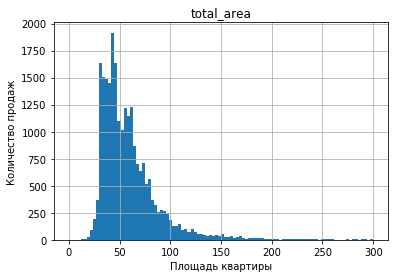

In [32]:
# Построим гистограмму и увидим, какая площадь квартиры встречается чаще всего


ax = df['total_area'].hist(bins=100,range=(0, 300))
ax.set_xlabel('Площадь квартиры')
ax.set_ylabel('Количество продаж')
ax.set_title('total_area')
plt.show()

In [33]:
df['total_area'].min() # минимальное значение

12.0

In [34]:
df['total_area'].max() # максимальное значение

900.0

In [35]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Основное распределение площади в объявлениях лежит в промежутке от 12 до 100 квадратных метров, среднее значения площади всех представленных квартир 60 кв.м. 
Шире всего на рынке представлены квартиры площадью от 40 до 69 кв.м.


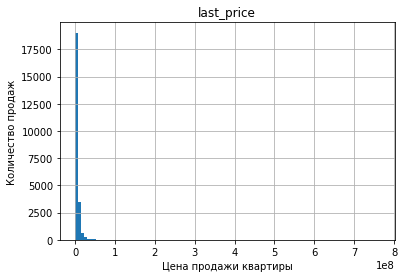

In [36]:
# Построим гистограмму и увидим, какая стоимость квартиры встречается чаще всего

ax_0 = df['last_price'].hist(bins=100)
ax_0.set_xlabel('Цена продажи квартиры')
ax_0.set_ylabel('Количество продаж')
ax_0.set_title('last_price')
plt.show()

In [37]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В основном цены на квартиры варьируются в диапазоне от 3,4 до 6,8 млн рублей. Однако среднее значение стоимости составляет 6.5 млн рублей, это влияние оказывают объявления из верхнего ценового сегмента.

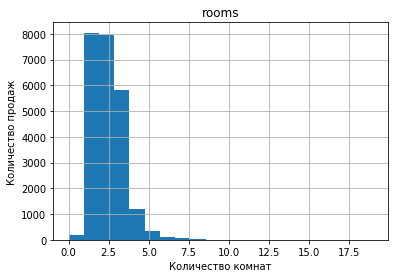

In [38]:
# Построим гистограмму и увидим, какое количество комнат  встречается чаще всего

ax1 = df['rooms'].hist(bins=20)
ax1.set_xlabel('Количество комнат')
ax1.set_ylabel('Количество продаж')
ax1.set_title('rooms')
plt.show()

In [39]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Больше всего продано однокомнатных и двухкомнатных квартир, их количество объявлений сопоставимо между собой. Однокомнатных - 8047, двухкомнатных -7940.

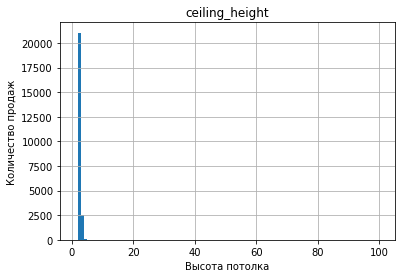

In [40]:
# Построим гистограмму и увидим, какая высота потолка в квартирах встречается чаще всего

ax_3 = df['ceiling_height'].hist(bins=100)
ax_3.set_xlabel('Высота потолка')
ax_3.set_ylabel('Количество продаж')
ax_3.set_title('ceiling_height')
plt.show()

In [41]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Стандартные значения потолка 2,65 - 2,70 метров. Максимальные и минимальные значение (100 и 1) не соответствуют реальности. Из-за максимального значения, не удается построить наглядный график. Очистим данные от выбросов и посмотрим на реальные данные 

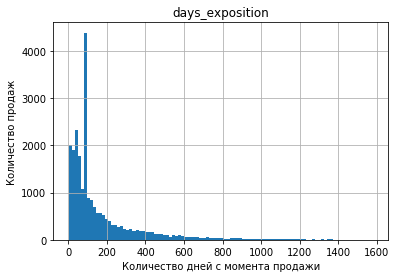

In [42]:
# Построим гистограмму и увидим, за какое количество времени чаще всего квартиры продаются 

ax_4 = df['days_exposition'].hist(bins = 100)
ax_4.set_xlabel('Количество дней с момента продажи')
ax_4.set_ylabel('Количество продаж')
ax_4.set_title('days_exposition')
plt.show()

In [43]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Цикл продажи длится от 1 дня до 400, выбиваются продажи с циклом от 800 до 1580, скорее всего это недвижимость сегмента премиум или недвижимость с завышенной стоимостью. Средняя продолжительность продажи занимает 169 дней, а медианное 95 дней. Самое максимальный срок 1580, а минимальный 1 день.

75 % объявлений снимаются по окончанию 199 дней, если объект недвижимости продается дольше, стоит в качестве рекомендации продавцу обратить внимание на условия продажи.  


In [44]:
# Сделаем срез данных и посмотрим на данные без аномальных значений столбцов с ценой, количеством комнат, общей площадью и выстой потолков

df_slice = df.query(
    '(0 < total_area < 100) and (1.219000e+04< last_price < 6.800000e+06) and (0 < rooms <= 5) and ( 2.4 <= ceiling_height <= 3)')

In [45]:
df_slice.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_publication,month_publication,year_publication,raсio_living_area,raсio_kitchen_area
count,17146.000000,1.714600e+04,17146.000000,17146.000000,17146.000000,17146.000000,15789.000000,17146.000000,15587.000000,17146.000000,...,4543.000000,17146.000000,5382.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,15789.000000,15587.000000
mean,9.418757,4.014608e+06,47.925507,1.787414,2.631993,10.560072,27.334729,5.816984,8.839541,0.580602,...,485.667180,0.436487,541.936641,158.797445,86321.104244,2.582643,6.386621,2017.385338,0.561177,0.193043
std,5.398386,1.353418e+06,13.751073,0.820492,0.101235,6.523013,10.664192,4.843324,3.050064,0.897523,...,315.683876,0.743175,275.674377,194.157806,27016.724951,1.803393,3.483194,1.006282,0.104245,0.070407
min,0.000000,4.300000e+05,12.000000,1.000000,2.400000,0.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,19.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.038462,0.043524
25%,6.000000,3.100000e+06,37.000000,1.000000,2.550000,5.000000,18.000000,2.000000,6.500000,0.000000,...,294.500000,0.000000,330.000000,45.000000,70078.494482,1.000000,3.000000,2017.000000,0.486486,0.138085
50%,9.000000,4.000000e+06,45.000000,2.000000,2.650000,9.000000,27.200000,4.000000,8.310000,0.000000,...,458.000000,0.000000,529.000000,95.000000,88072.411533,3.000000,6.000000,2017.000000,0.563910,0.180645
75%,13.000000,5.000000e+06,57.000000,2.000000,2.650000,15.000000,33.500000,8.000000,10.200000,1.000000,...,611.000000,1.000000,747.000000,187.000000,103273.475334,4.000000,10.000000,2018.000000,0.635492,0.241679
max,39.000000,6.799000e+06,99.100000,5.000000,3.000000,60.000000,80.000000,31.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,292307.692308,6.000000,12.000000,2019.000000,0.975754,0.787879


### Факторы влияния на продажу и стоимость квартир<a name="part_6"></a>

- Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 


In [46]:
# посчитаем коэффициент корреляции Пирсона между стоимостью и площадью квартиры

df_slice['last_price'].corr(df_slice['total_area'])

0.4973020256533441

Коэффициент корреляции между ценой и площадью квартиры Пирсона - положительный и составляет 0,50, такой коэффицент говорит о наличии связи

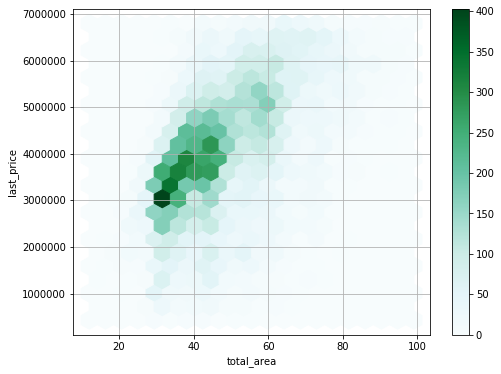

In [47]:
# Посмотрим на корреляцию на графике

df_slice.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

Мы можем говорить о том, что с увеличением площади квартиры увеличивается и ее цена. 

In [48]:
# посчитаем коэффициент корреляции Пирсона между стоимостью и количеством комнат в квартире

df_slice['last_price'].corr(df_slice['rooms'])

0.31330440464264164

Коэффициент корреляции Пирсона между ценой и количеством комнат - положительный и составляет 0,31

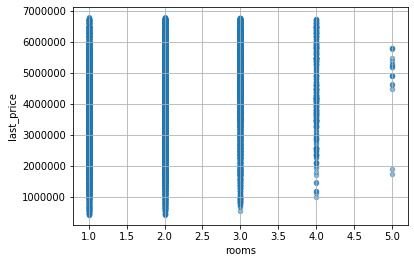

In [49]:
# Посмотрим на корреляцию на графике

df_slice.plot(x='rooms', y='last_price', kind='scatter', grid = True, alpha = 0.5)
plt.show()

С увеличением числа комнат в квартире увеличивается и ее цена. Эта связь также является подтверждением зависимости цены от общей площади от их удаленности от центра

In [50]:
# посчитаем коэффициент корреляции Пирсона между стоимостью и удаленностью от центра

df_slice['last_price'].corr(df_slice['cityCenters_nearest'])

-0.2737525216404764

Коэффициент корреляции Пирсона между ценой и удаленностью от центра отрицательный  и составляет: -0,34.

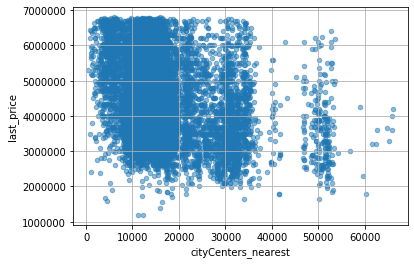

In [51]:
# Посмотрим на корреляцию на графике

df_slice.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid = True, alpha = 0.5)
plt.show()

Стоимость квартир дешевеет от их удаленности от центра. 

- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

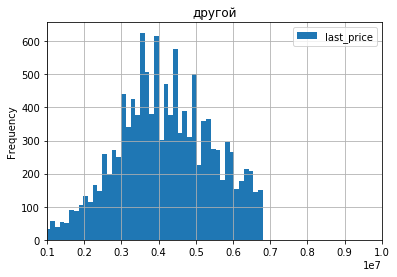

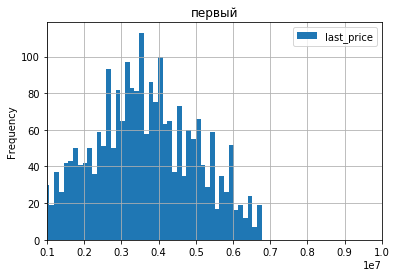

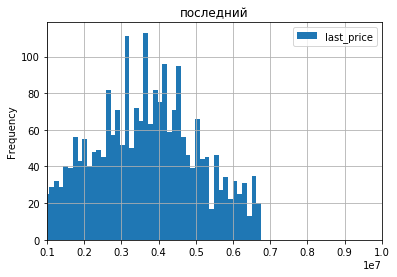

In [52]:
# Построим гистограммы и посмотрим как расположение квартиры влияет на стоимость

df_price_corr = df_slice[['last_price','floor_category']]

df_price_corr.groupby('floor_category')['last_price']

for group_name, group_df in df_price_corr.groupby('floor_category'):
    
    group_df.plot(y = 'last_price', kind = 'hist', title = group_name, bins = 50,xlim = (10**6, 1*10**7), grid = True)

Судя по графику самыми дорогими квартирами являются квартиры расположенные не на первом и не на последнем этаже.

In [53]:
# Посмотрим на влияние сезонности

dt_corr = df_slice[['last_price','weekday_publication', 'year_publication', 'month_publication']]

dt_corr.corr()

,last_price,weekday_publication,year_publication,month_publication
last_price,1.000000,-0.012517,0.014513,0.000954
weekday_publication,-0.012517,1.000000,0.000594,0.005791
year_publication,0.014513,0.000594,1.000000,-0.265039
month_publication,0.000954,0.005791,-0.265039,1.000000


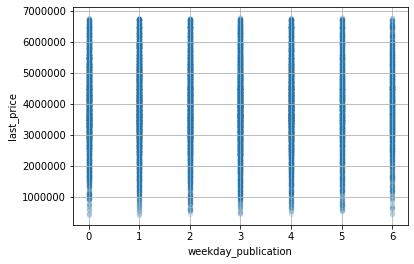

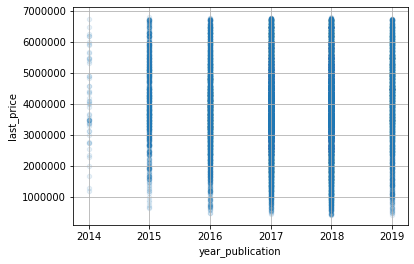

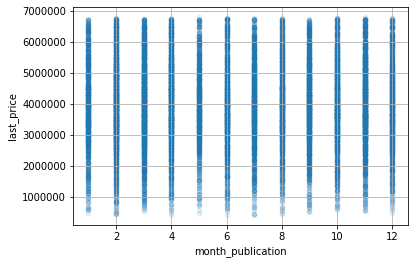

In [54]:

columns_list = ['weekday_publication', 'year_publication', 'month_publication']

for column in columns_list:
    
    dt_corr.plot(x = column , y = 'last_price', kind = 'scatter', grid = True, alpha = 0.1)

Изменение цены от публикации объявления в определенный день недели не прослеживается. В распределении публикаций по годам можно увидеть рост до 2017 года, после стагнация. В распределении по месяцам можно увидеть небольшую сезонность, в летне-осенний период наблюдается спад  

- Выведем список из 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра для каждого населенного пункта. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [55]:
# список из 10 населенных пунктов с наибольшим числом объявлений

locality_top = df_slice['locality_name'].value_counts().head(10)

In [56]:
locality_top_10 = df_slice.query('locality_name in @locality_top.index')

In [57]:
locality_top_10.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_publication,month_publication,year_publication,floor_category,raсio_living_area,raсio_kitchen_area
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,0.0,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557


In [58]:
pivot_locality_top = locality_top_10.pivot_table(index=['locality_name'], values=['price_per_meter'],
                                                 aggfunc='mean').sort_values('price_per_meter', ascending = False)

In [59]:
pivot_locality_top.head(10)

,price_per_meter
locality_name,
Санкт-Петербург,100799.670786
Пушкин,97687.173793
деревня Кудрово,91698.382067
посёлок Парголово,90150.649972
посёлок Мурино,84948.923956
посёлок Шушары,78308.005816
Колпино,75030.158138
Гатчина,67876.741337
Всеволожск,66453.400533


Самая высокая цена за квадратный метр в Санкт-Петербурге, в Выборге цена за квадратный метр оказалась ниже остальных населенных пунктов.

In [60]:
# Выделите квартиры в Санкт-Петербурге и выясним, какая область входит в центр

locality_name_spb = df_slice.query('locality_name == "Санкт-Петербург"') 

In [61]:
# Создим столбец с расстоянием до центра в километрах: округлим до целых значений

locality_name_spb['cityCenters_nearesеt_spb']= round(locality_name_spb['cityCenters_nearest']/1000,0) 

import warnings

warnings.filterwarnings('ignore')

In [62]:
# Посчитаем среднюю цену для каждого километра

spb_price = locality_name_spb.groupby('cityCenters_nearesеt_spb')['last_price'].mean()

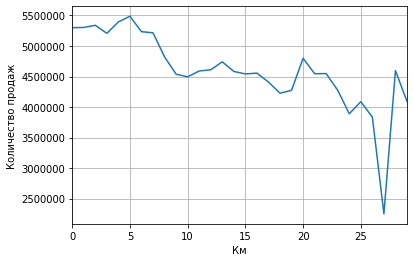

In [63]:
# Построим график, посмотрим как цена зависит от удалённости от центра

centr = spb_price.plot(kind = 'line', grid = True)
centr.set_xlabel('Км')
centr.set_ylabel('Количество продаж')
plt.show()

Падение начинается с отметки 5 км. До 5 км от центра включительно и будет центральным расположением, так мы сможем обнаружить очень яркие отличия показателей по сравнению с отсальной частью города.

In [64]:
# Выделим сегмент квартир в центре и посмотрим как отличаются выводов по всему городу

spb_centr = locality_name_spb.query('(locality_name == "Санкт-Петербург") and cityCenters_nearesеt_spb <=5')

In [65]:
spb_centr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_publication,month_publication,year_publication,floor_category,raсio_living_area,raсio_kitchen_area,cityCenters_nearesеt_spb
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,True,...,124.0,265.0,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
138,8,4800000.0,40.0,2017-11-18,2,2.65,3,29.0,2,True,...,729.0,80.0,120000.000000,5,11,2017,другой,0.725000,0.150000,3.0
141,8,6500000.0,32.6,2019-02-27,1,2.65,5,18.5,5,True,...,NaN,95.0,199386.503067,2,2,2019,последний,0.567485,0.168712,5.0
291,10,5900000.0,70.0,2017-01-24,3,2.51,5,47.4,1,True,...,118.0,480.0,84285.714286,1,1,2017,первый,0.677143,0.114286,4.0
305,12,6283000.0,70.8,2017-10-05,3,2.65,5,50.9,5,True,...,NaN,61.0,88742.937853,3,10,2017,последний,0.718927,0.115819,4.0


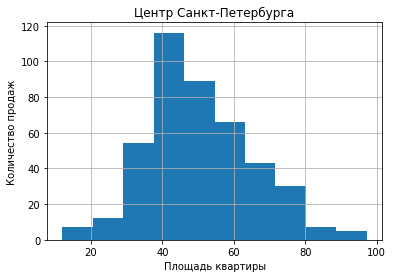

In [66]:
hist_centr = spb_centr['total_area'].hist()
hist_centr.set_xlabel('Площадь квартиры')
hist_centr.set_ylabel('Количество продаж')
hist_centr.set_title('Центр Санкт-Петербурга')
plt.show()

In [67]:
spb_centr['total_area'].describe()

count    429.000000
mean      50.377156
std       14.750961
min       12.000000
25%       40.300000
50%       48.000000
75%       60.200000
max       97.200000
Name: total_area, dtype: float64

Самый продаваемые квартиры для центра Санкт-Петербурга с площадью 48-60 кв. метров

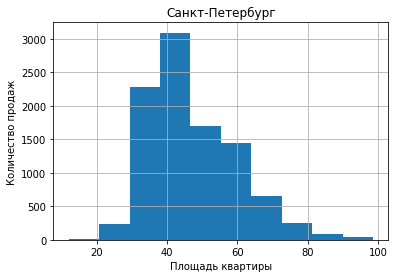

In [68]:
hist_spb = locality_name_spb['total_area'].hist()
hist_spb.set_xlabel('Площадь квартиры')
hist_spb.set_ylabel('Количество продаж')
hist_spb.set_title('Санкт-Петербург')
plt.show()

In [69]:
locality_name_spb['total_area'].describe()

count    9791.000000
mean       47.087434
std        12.765083
min        12.000000
25%        37.390000
50%        45.000000
75%        55.530000
max        98.610000
Name: total_area, dtype: float64

Самый продаваемые квартиры для Санкт-Петербурга с площадью 45-55 кв. метров. Почти не значительные расхождения с центром.

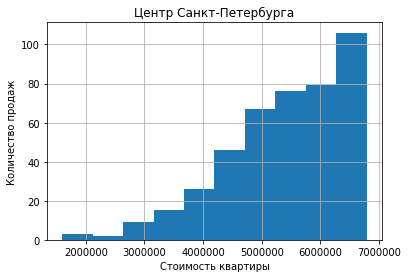

count    4.290000e+02
mean     5.393873e+06
std      1.027207e+06
min      1.600000e+06
25%      4.800000e+06
50%      5.500000e+06
75%      6.250000e+06
max      6.790000e+06
Name: last_price, dtype: float64

In [70]:
hist_price_centr = spb_centr['last_price'].hist()
hist_price_centr.set_xlabel('Стоимость квартиры')
hist_price_centr.set_ylabel('Количество продаж')
hist_price_centr.set_title('Центр Санкт-Петербурга')
plt.show()
spb_centr['last_price'].describe()

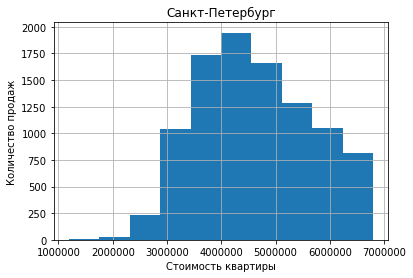

count    9.791000e+03
mean     4.619597e+06
std      1.043739e+06
min      1.190000e+06
25%      3.800000e+06
50%      4.525000e+06
75%      5.400000e+06
max      6.799000e+06
Name: last_price, dtype: float64

In [71]:
hist_price_spb = locality_name_spb['last_price'].hist()
hist_price_spb.set_xlabel('Стоимость квартиры')
hist_price_spb.set_ylabel('Количество продаж')
hist_price_spb.set_title('Санкт-Петербург')
plt.show()
locality_name_spb['last_price'].describe()

Ожидаемо в центре квартире дороже

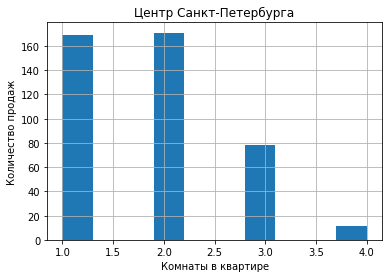

In [72]:
hist_rooms_centr = spb_centr['rooms'].hist()
hist_rooms_centr.set_xlabel('Комнаты в квартире')
hist_rooms_centr.set_ylabel('Количество продаж')
hist_rooms_centr.set_title('Центр Санкт-Петербурга')
plt.show()

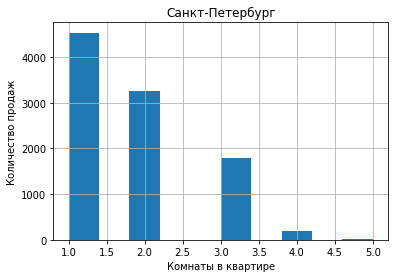

In [73]:
hist_rooms_spb = locality_name_spb['rooms'].hist()
hist_rooms_spb.set_xlabel('Комнаты в квартире')
hist_rooms_spb.set_ylabel('Количество продаж')
hist_rooms_spb.set_title('Санкт-Петербург')
plt.show()

В отличии от города в целом, в центре большей популярность пользуются 2х комнатные квартиры. 4  комнатные квартиры в центре наоборот продаются чаще.


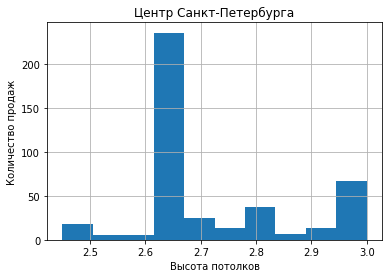

count    429.000000
mean       2.726970
std        0.139656
min        2.450000
25%        2.650000
50%        2.650000
75%        2.800000
max        3.000000
Name: ceiling_height, dtype: float64

In [74]:
hist_ceilings_centr = spb_centr['ceiling_height'].hist()
hist_ceilings_centr.set_xlabel('Высота потолков')
hist_ceilings_centr.set_ylabel('Количество продаж')
hist_ceilings_centr.set_title('Центр Санкт-Петербурга')
plt.show()
spb_centr['ceiling_height'].describe()

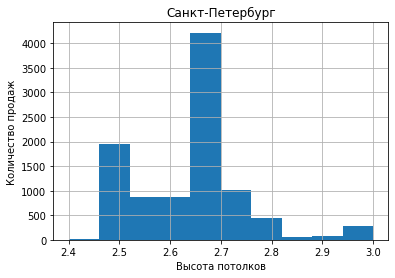

count    9791.000000
mean        2.633287
std         0.105445
min         2.400000
25%         2.550000
50%         2.650000
75%         2.650000
max         3.000000
Name: ceiling_height, dtype: float64

In [75]:
hist_ceilings_spb = locality_name_spb['ceiling_height'].hist()
hist_ceilings_spb.set_xlabel('Высота потолков')
hist_ceilings_spb.set_ylabel('Количество продаж')
hist_ceilings_spb.set_title('Санкт-Петербург')
plt.show()
locality_name_spb['ceiling_height'].describe()

Средняя высота потолков в объявлениях из центра на 10 см превышает высоту потолков по городу в целом.

In [76]:
rooms_price = locality_name_spb.groupby('rooms')['last_price'].mean()

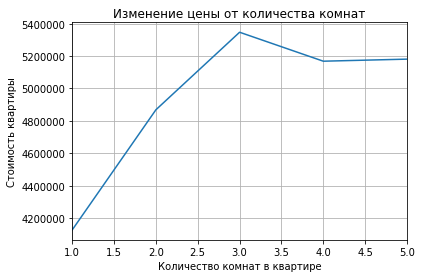

In [77]:
rooms_price_plot = rooms_price.plot(kind = 'line', grid = True)
rooms_price_plot.set_xlabel('Количество комнат в квартире')
rooms_price_plot.set_ylabel('Стоимость квартиры')
rooms_price_plot.set_title('Изменение цены от количества комнат')
plt.show()

Самые дорогие квартиры трехкомнатные

In [78]:
floor_price = locality_name_spb.groupby('floor_category')['last_price'].mean()

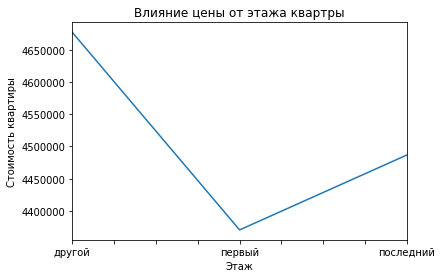

In [79]:
floor_price_plot = floor_price.plot()
floor_price_plot.set_xlabel('Этаж')
floor_price_plot.set_ylabel('Стоимость квартиры')
floor_price_plot.set_title('Влияние цены от этажа квартры')
plt.show()

In [80]:
cityCenters_nearest_price = locality_name_spb.groupby('cityCenters_nearest')['last_price'].mean()

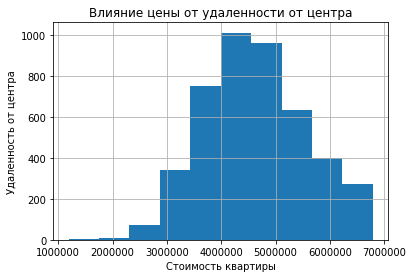

In [81]:
nearest_price_hist = cityCenters_nearest_price.hist()
nearest_price_hist.set_xlabel('Стоимость квартиры')
nearest_price_hist.set_ylabel('Удаленность от центра')
nearest_price_hist.set_title('Влияние цены от удаленности от центра')
plt.show()

In [82]:
day_exposition_price = locality_name_spb.groupby('first_day_exposition')['last_price'].mean() 

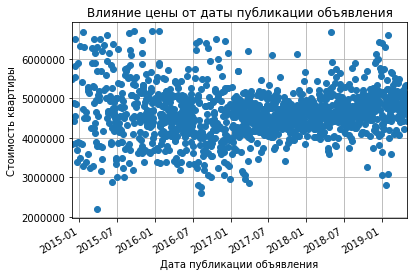

In [83]:
publ_price_plot = day_exposition_price.plot(x='first_day_exposition', y='last_price', style='o',grid=True)
publ_price_plot.set_xlabel('Дата публикации объявления')
publ_price_plot.set_ylabel('Стоимость квартиры')
publ_price_plot.set_title('Влияние цены от даты публикации объявления')
plt.show()

## Общий вывод<a name="part_7"></a>

Для объекта изучения были выбраны только проданные квартиры, чтобы изучить факторы влияния на продажи необходимо также изучить данные и по квартирам, которые не были проданы. 

Основное распределение площади проданной недвижимости лежит в промежутке от 25 до 100 квадратных метров, среднее значения площади всех представленных квартир 45 кв.м. Шире всего на рынке представлены квартиры площадью от 29 до 52 кв.м. В основном Основная цены на квартиры варьируются в диапазоне от 3,4 до 6,8 млн рублей. 

Больше всего продаются однокомнатных и двухкомнатных квартиры. Стандартные значения потолка 2,65 - 2,70 метров. Цикл продажи длится от 1 дня до 400, выбиваются продажи с циклом от 800 до 1580, скорее всего это недвижимость сегмента премиум или недвижимость с завышенной стоимостью. 75 % объявлений снимаются по окончанию 199 дней, если объект недвижимости продается дольше, стоит в качестве рекомендации продавцу обратить внимание на условия продажи.  Самая высокая цена за квадратный метр в Санкт-Петербурге, в Выборге цена за квадратный метр оказалась ниже остальных населенных пунктов

Объявления внутри Санкт-Петербурга были отдельно изучены, графически было определена область центра города (радиус 5 км включительно). Ожидаемо в центре города квартиры дороже отличии от города в целом, также центре большей популярность пользуются 2х комнатные квартиры. Средняя высота потолков в объявлениях из центра на 10 см превышает высоту потолков по городу в целом.
